# Unsupervised Analysis of days of Week

Treating crossings each day as features to learn about the relationships between various days.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

## Get Data 

In [2]:
df = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240716.csv', index_col ='Date', parse_dates=True)

C:\Users\alish\AppData\Local\Temp\ipykernel_22716\3922072062.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240716.csv', index_col ='Date', parse_dates=True)


# Clean Data

In [3]:
np.unique(df.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [4]:
! head Fremont_Bridge_Bicycle_Counter_20240716.csv

Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
10/02/2012 01:00:00 PM,55,7,48
10/02/2012 02:00:00 PM,130,55,75
10/02/2012 03:00:00 PM,152,81,71
10/02/2012 04:00:00 PM,278,167,111
10/02/2012 05:00:00 PM,563,393,170
10/02/2012 06:00:00 PM,381,236,145
10/02/2012 07:00:00 PM,175,104,71
10/02/2012 08:00:00 PM,86,51,35
10/02/2012 09:00:00 PM,63,35,28


In [5]:
df.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [6]:
df.shape

(102947, 3)

In [7]:
df.index

DatetimeIndex(['2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               '2012-10-02 19:00:00', '2012-10-02 20:00:00',
               '2012-10-02 21:00:00', '2012-10-02 22:00:00',
               ...
               '2024-06-30 14:00:00', '2024-06-30 15:00:00',
               '2024-06-30 16:00:00', '2024-06-30 17:00:00',
               '2024-06-30 18:00:00', '2024-06-30 19:00:00',
               '2024-06-30 20:00:00', '2024-06-30 21:00:00',
               '2024-06-30 22:00:00', '2024-06-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=102947, freq=None)

In [8]:
pd.to_datetime(df.index, format = '%m/%d/%y %H:%M:%S %p')

DatetimeIndex(['2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               '2012-10-02 19:00:00', '2012-10-02 20:00:00',
               '2012-10-02 21:00:00', '2012-10-02 22:00:00',
               ...
               '2024-06-30 14:00:00', '2024-06-30 15:00:00',
               '2024-06-30 16:00:00', '2024-06-30 17:00:00',
               '2024-06-30 18:00:00', '2024-06-30 19:00:00',
               '2024-06-30 20:00:00', '2024-06-30 21:00:00',
               '2024-06-30 22:00:00', '2024-06-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=102947, freq=None)

<Axes: xlabel='Date'>

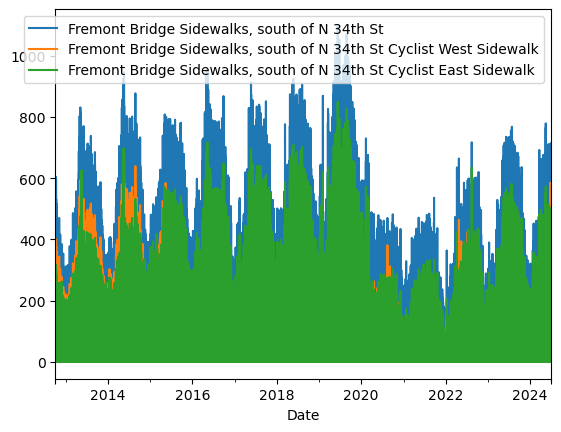

In [9]:
df.plot()

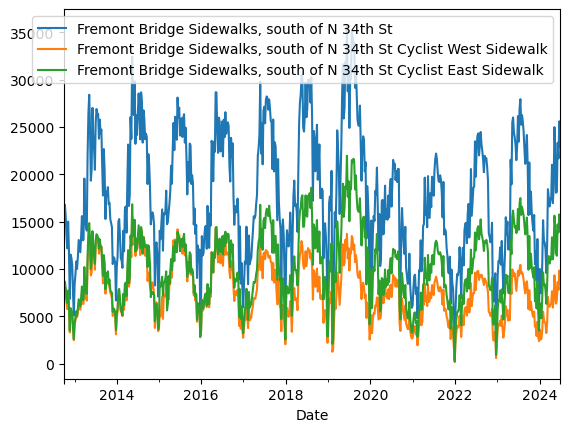

In [10]:
df.resample('W').sum().plot();

<Axes: xlabel='Date'>

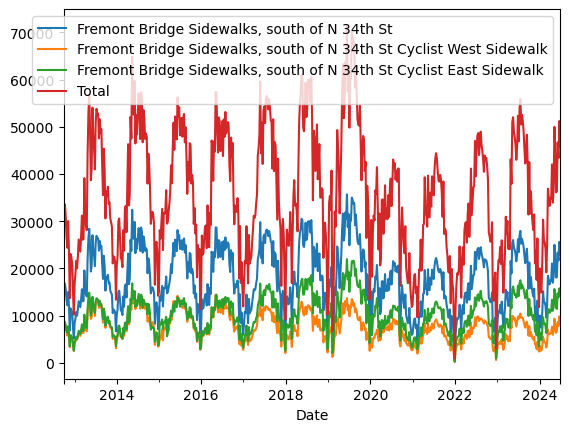

In [29]:
df.resample('W').sum().plot()

(0.0, 2526742.55)

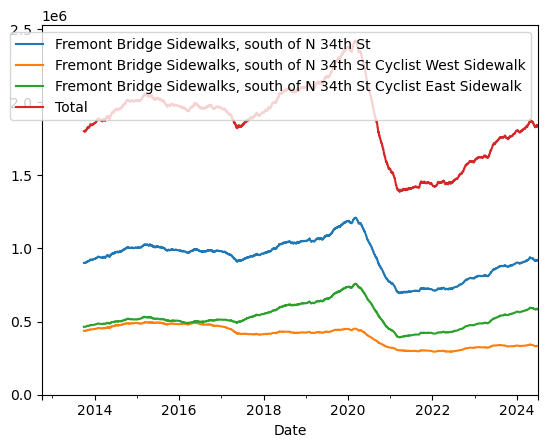

In [12]:
df['Total'] = df['Fremont Bridge Sidewalks, south of N 34th St'] + df['Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk'] + df['Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk']
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

<Axes: xlabel='time'>

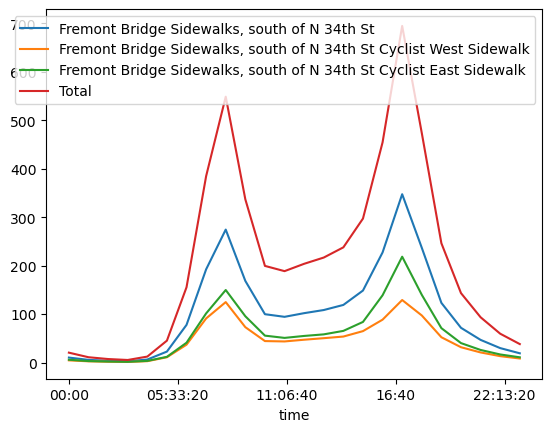

In [13]:
df.groupby(df.index.time).mean().plot()

In [14]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5,:5]

,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06
00:00:00,NaN,26.0,36.0,22.0,30.0
01:00:00,NaN,20.0,6.0,16.0,30.0
02:00:00,NaN,4.0,18.0,14.0,18.0
03:00:00,NaN,10.0,6.0,8.0,6.0
04:00:00,NaN,14.0,16.0,18.0,10.0


<Axes: xlabel='time'>

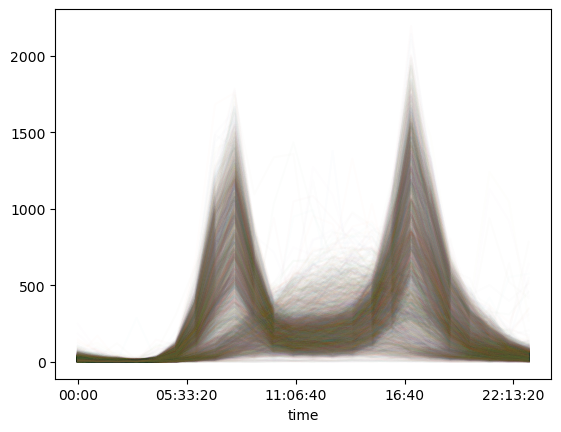

In [15]:
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [16]:
pivoted.index

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

In [17]:
X = pivoted.fillna(0).T.values
X.shape

(4290, 24)

In [31]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [19]:
X2.shape

(4290, 2)

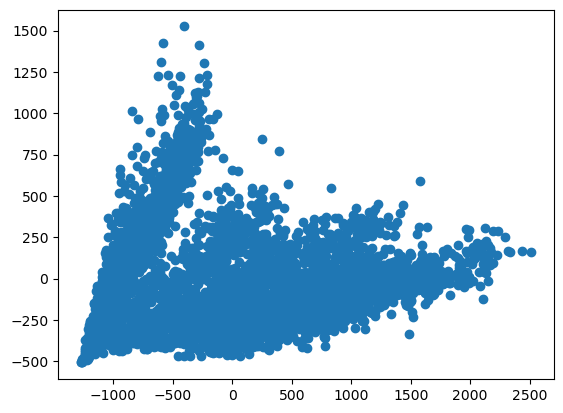

In [33]:
plt.scatter(X2[:,0], X2[:,1])

## Unsupervised Clustering 

In [35]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

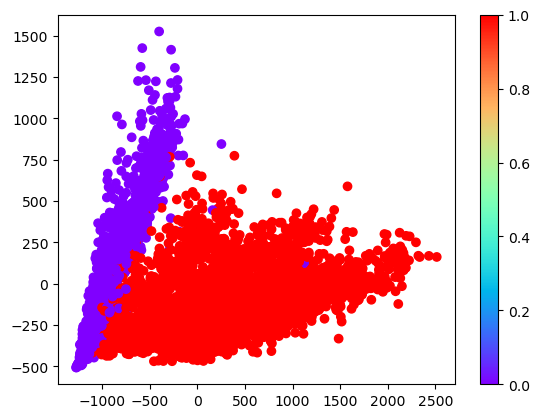

In [22]:
plt.scatter(X2[:,0], X2[:,1],c=labels, cmap= 'rainbow')
plt.colorbar()

<Axes: xlabel='time'>

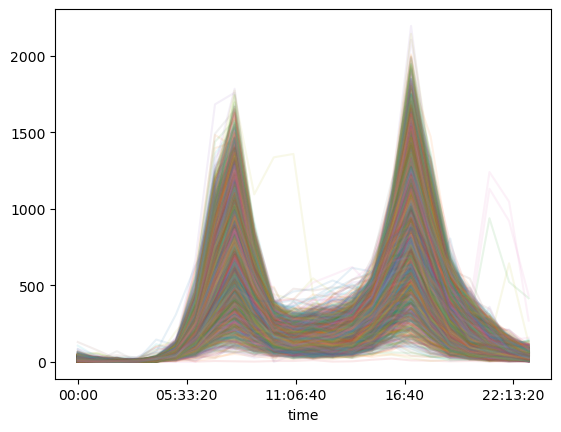

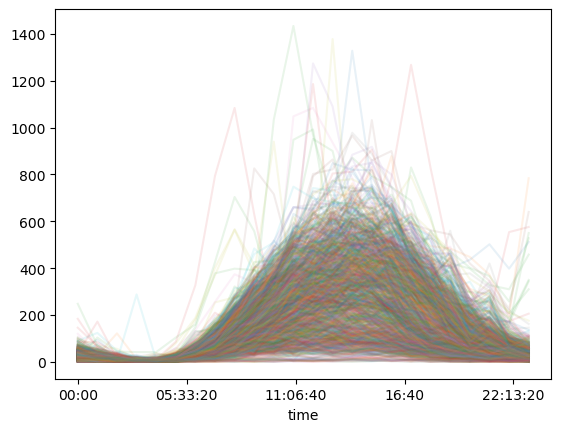

In [23]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)
pivoted.T[labels == 0].T.plot(legend=False, alpha =0.1)

## Comparing With Day of Week

In [24]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

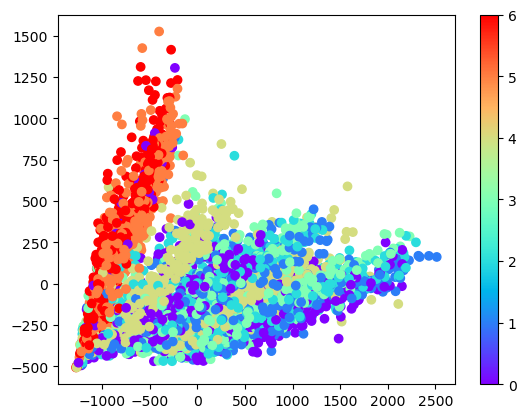

In [25]:
plt.scatter(X2[:,0], X2[:,1], c = dayofweek, cmap = 'rainbow')
plt.colorbar()

## Analyzing Outliers 

The following points are week days with a holiday like pattern

In [26]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05',
               '2012-10-08', '2012-10-09', '2012-10-10', '2012-10-11',
               '2012-10-12', '2012-10-15',
               ...
               '2024-06-14', '2024-06-17', '2024-06-18', '2024-06-19',
               '2024-06-20', '2024-06-24', '2024-06-25', '2024-06-26',
               '2024-06-27', '2024-06-28'],
              dtype='datetime64[ns]', length=2942, freq=None)

>>> What's up with Feb 6, 2017? [Snow Storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)